In [1]:
import math
import random
import matplotlib.pyplot as plt

**Problem Statement:**

In this project we will create a system which will help delivery boys to deliver parcel in a time  efficient order. The problem is to rank the delivery location in the order, the delivery boy should visit to optimize the trip. The problem is very similar to the travelling salesman problem and we will try to optimize it using Artificial Intelligence.

The above problem is an NP-hard problem. The brute force solution is not practically possible as the time complexity is O(n!). An optimized approach using DP is also not relevant as its time complexity is O(n^2 . 2^n). Using the optimized approach we can compute for n <= 23 in feasible time. 

**Solution:**

We have solved this problem using simmulated annealing. We have tested for two type of neighbourhood generation methods

1. Choose two locations randomly and swap them
2. Choose a random segment of the current path and reverse it

In [2]:
class City:
    def __init__(self, name, lat, lng):
        self.lat = lat
        self.lng = lng
        self.name = name

In [3]:
class TSP:
    def __init__(self, coordinates, initial_temp=-1, snhg = False):
        self.snhg = snhg
        self.coordinates = coordinates
        self.N = len(coordinates)
        self.T = math.sqrt(N) if initial_temp==-1 else initial_temp
        self.alpha = 0.999
        self.stop_T = 1e-10
        self.nodes = [i for i in range(self.N)]
        self.best_path = None
        self.best_fit = float('Inf')
        self.fitness_list = []
        
    def cost(self, city1, city2):
        # This function return distance between two cities
        # in kilo meters
        cityA = (city1.lat, city1.lng)
        cityB = (city2.lat, city2.lng)
        
        # return geodesic(cityA, cityB).km
        return (city1.lat - city2.lat)**2 + (city1.lng - city2.lng)**2
    
    def fitness(self, path):
        # This function computes total cost for following solution path
        fit = 0
        n = self.N
        coords = self.coordinates
        for i in range(n):
            fit += self.cost(coords[path[i % n]], coords[path[(i+1) % n]])
        return fit
    
    def initial_path(self):
        coords = self.coordinates
        curr_node = 4 #random.choice(self.nodes)
        path = [curr_node]
        nodes_left = set(self.nodes)
        
        while nodes_left:
            next_node = min(nodes_left, key=lambda x: self.cost(coords[curr_node], coords[x]))
            curr_node = next_node
            path.append(curr_node)
            nodes_left.remove(curr_node)
            
        fit = self.fitness(path)
        self.fitness_list.append(fit)
        
        if fit < self.best_fit:
            self.best_fit = fit
            self.best_path = path
        
        return fit, path
    
    def prob_accept(self, fitness):
        # this function will compute probability of accepting a solution with 
        # bad fitness
        return math.exp(-abs(fitness - self.curr_fitness)/ self.T)
    
    def accept_path(self, path):
        fitness = self.fitness(path)
        
        if fitness < self.curr_fitness:
            self.curr_fitness = fitness
            self.curr_path = path
            
            if fitness < self.best_fit:
                self.best_fit = fitness
                self.best_path = path
        else:
            if random.random() < self.prob_accept(fitness):
                self.curr_fitness = fitness
                self.curr_path = path
    
    def start(self):
        N = self.N
        self.curr_fitness, self.curr_path = self.initial_path()
        # print(self.curr_path)
        # print(self.curr_fitness)
        
        while self.T >= self.stop_T:
            path = list(self.curr_path)
            
            if(self.snhg):
              a = random.randint(1, N-1)
              b = random.randint(1, N-1)
              path[a], path[b] = path[b], path[a]
            else:
              start = random.randint(1, N-1)
              length = random.randint(2, N-1)
              
              path[start : (start+length)] = reversed(path[start : (start+length)])

            self.accept_path(path)
            
            self.T = self.T * self.alpha
            self.fitness_list.append(self.curr_fitness)
    
    def plot_fitness_learning(self):
        plt.plot([i for i in range(len(self.fitness_list))], self.fitness_list)
        plt.ylabel("Fitness f(n)")
        plt.xlabel("Iterations")
        plt.show()

We have tested for both the methods of neighbourhood generation. The output shows number of cases where method 1 (Choose two locations randomly and swap them) performs better than method 2 (Choose a random segment of the current path and reverse it).

In [4]:
cities = [ City('0', 23.208492, 72.623324),City('1', 23.201693498993656, 72.64445543857545),City('2', 23.20185127693657, 72.63956308941086),City('3', 23.206742300789138, 72.6468586978142),City('4', 23.216642131804818, 72.64917612636584),City('5', 23.20950328359702, 72.63986349681572),City('6', 23.216642131804818, 72.62883425352359),City('7', 23.207373387603145, 72.6311087667317),City('8', 23.198134687254047, 72.63224472517344),City('9', 23.23627985475752, 72.64343592053481),City('10', 23.236846677984722, 72.64682865408993),City('11', 23.23401253777306, 72.65124948872237),City('12', 23.23235926152179, 72.65022138764506),City('13', 23.22914712340476, 72.64055723751834),City('14', 23.233256756885027, 72.63279507438465),City('15', 23.229052647584133, 72.64024880719515),City('16', 23.22881645774003, 72.62996779642202),City('17', 23.226123863982046, 72.63726731407095),City('18', 23.22277274592091, 72.67275979516798),City('19', 23.241501203524585, 72.67460702229776),City('20', 23.251911052334325, 72.65558058286102),City('21', 23.24427347089138, 72.63193607559984),City('22', 23.247668005528574, 72.66629450021374),City('23', 23.23884203579948, 72.65915188864527),City('24', 23.22639416318717, 72.62430087013007),City('25', 23.258812786853426, 72.65237872249978),City('26', 23.252476781855716, 72.63747775698621),City('27', 23.25377795030707, 72.66210745204994),City('28', 23.23420250988928, 72.67503804200693),City('29', 23.220905414114767, 72.66198430362613),City('30', 23.217906311662013, 72.67085099384909),City('31', 23.218528772426332, 72.62497818679287),City('32', 23.25881278690115, 72.64191110209084),City('33', 23.21298311052329, 72.65687364184996),City('34', 23.20489055829563, 72.62405457316562),City('35', 23.228996995781984, 72.64831482278464),City('36', 23.207267442593828, 72.65693521606585),City('37', 23.197646459512228, 72.64178795360668),City('38', 23.229081870043593, 72.66072203173734),City('39', 23.233495250668593, 72.65576530560575),City('40', 23.230043773128646, 72.66903455382135)]

count = 0 # better count of snhg
for i in range(100):
  tsp = TSP(cities, initial_temp = 5000)
  tsp.start()
  a = tsp.best_fit
  tsp = TSP(cities, initial_temp = 5000, snhg = True)
  tsp.start()
  b = tsp.best_fit
  if(b<a):
    count += 1
print(count)

1


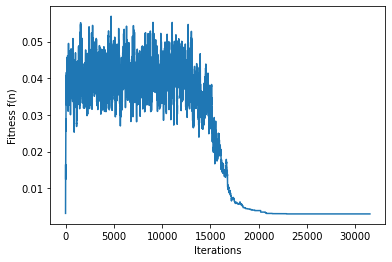

In [14]:
tsp = TSP(cities, initial_temp = 5000)
tsp.start()
tsp.plot_fitness_learning()

In [15]:
print(tsp.best_path)

[4, 4, 29, 30, 18, 40, 28, 19, 22, 27, 25, 32, 26, 20, 23, 38, 39, 11, 12, 10, 9, 21, 14, 15, 13, 17, 16, 24, 31, 6, 0, 34, 7, 5, 2, 8, 37, 1, 3, 36, 33, 35]


In [16]:
res = []
for i in tsp.best_path:
    res.append(cities[i])

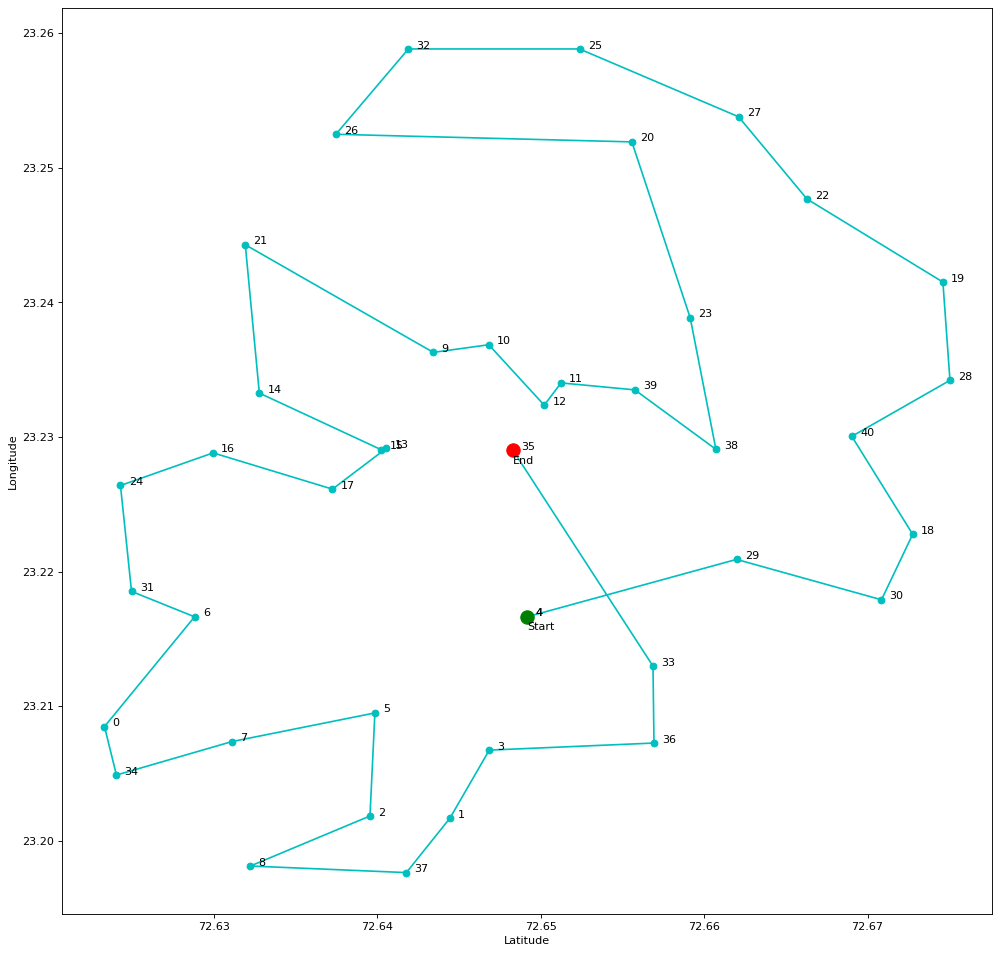

In [17]:
plt.figure(figsize=(15, 15), dpi=80)
y = []
for i in tsp.best_path:
    y.append(cities[i].lat)
    
x = []
for i in tsp.best_path:
    x.append(cities[i].lng)
    
plt.plot(x, y, 'oc-')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
for city in res:
    plt.text(city.lng + 0.0005, city.lat+ 0.00005, city.name)

plt.text(res[0].lng, res[0].lat- 0.001, 'Start')
plt.plot(res[0].lng, res[0].lat, 'go', markersize=12)
plt.text(res[-1].lng, res[-1].lat- 0.001, 'End')
plt.plot(res[-1].lng, res[-1].lat, 'ro', markersize=12)
plt.show()

In [13]:
tsp.best_fit

0.003107251816086149